# Исследовательский анализ оттока клиентов банка 

## Первая часть 

### Цель исследования 

На основе данных датасета bank_dataset.csv необходимо провести исследовательский анализ портретов, поведения, активности клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

### Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Столбцы датасета:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности 
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Открытие файла и изучение общей информации о предоставленных данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as st
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,5)
pd.options.display.max_columns = None

In [2]:
#чтение файла bank_dataset.csv с данными и сохранение его в переменную 
data = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
#вывод первых 10 строк датафрейма
data.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#вывод общей информации о датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Вывод по первой части: импортированы библиотеки, датасет, просмотрена общая информация о датасете: дан датасет, состоящий из 12 столбцов, 10000 строк, в данных имеются пропуски, также необходимо привести наименование колонок к общему виду, типы данных float, int, object.

## Вторая часть

### Предобработка данных

In [5]:
#вывод пропущенных значений датасета 
data.isnull().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

In [6]:
#вывод общей информации о датафрейме для просмотра типов данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
#приведение наименования столбцов к нижнему регистру 
data.columns = data.columns.str.lower()

In [8]:
#изменение наименований столбцов
data = data.rename(
                  columns = {
                        'userid': 'user_id',
                        'score': 'score',
                        'City': 'city', 
                        'Gender':'gender',
                        'Age': 'age',
                        'Objects': 'objects',
                        'Balance': 'balance',
                        'Products': 'products',
                        'creditcard': 'credit_card',
                        'Loyalty': 'loyalty',
                        'estimated_salary': 'estimated_salary',
                        'Churn': 'churn'
                             }
                  )

In [9]:
#исследование датафрейма на явные дубликаты 
data.duplicated().sum()

0

In [10]:
#повторный вывод пропущенных значений датафрейма для их анализа и проверки переименования столбцов
data.isnull().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Наблюдаются пропущенные значения в столбце balance, необходимо вывести более подробную информацию о данном столбце, чтобы проанализировать, как заполнить пропущенные значения.

In [11]:
data['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Минимальное значение баланса в датасете 3768,69 усл.ед., максимальное значение баланса 250898,09 усл. ед., пропущенных значений 3617, что составляет 36% от общего датасета. 
Далее рассмотрим отдельно датасет с пропущенными значениями balance и выдвинем предложение о заполнение данных пропусков. 

In [12]:
#вывод пропущенных значений столбца balance
null_balance = data[data['balance'].isnull()]
display(null_balance)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


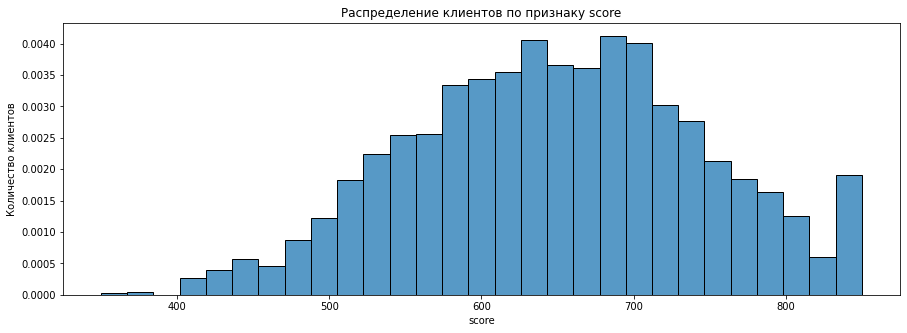

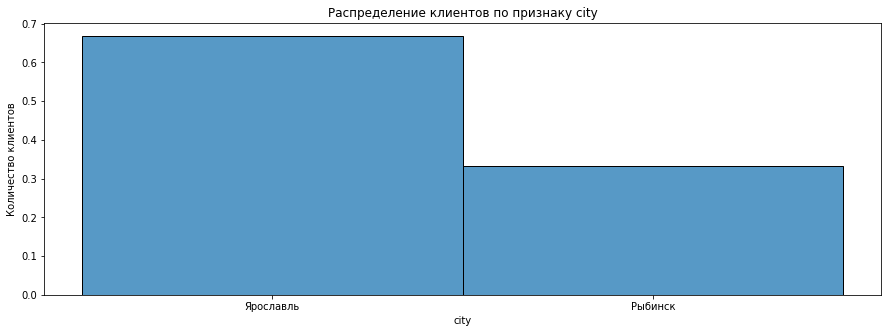

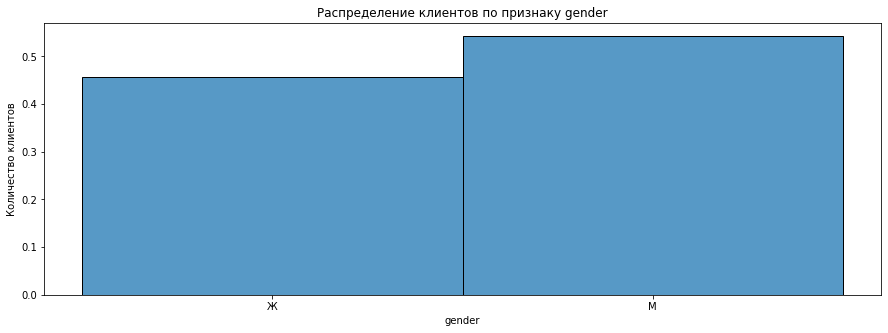

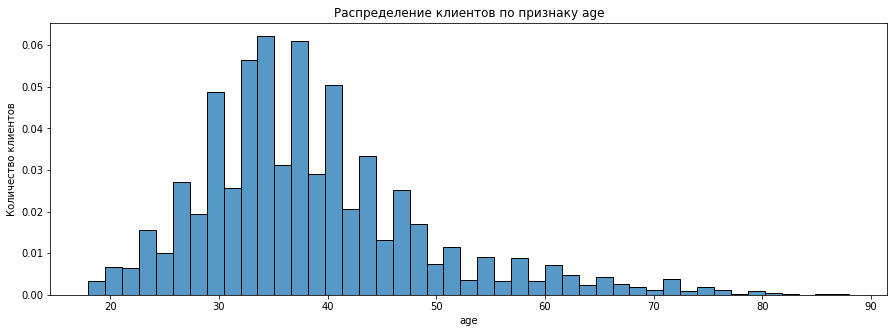

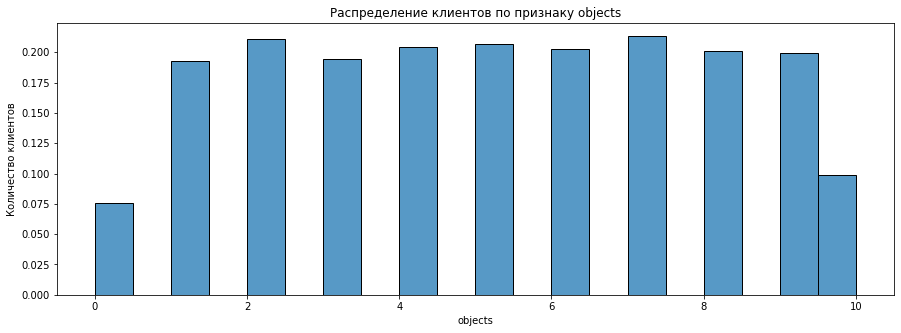

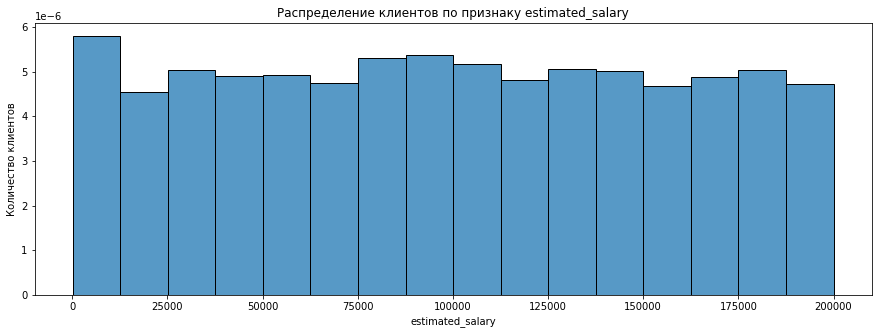

In [13]:
#построение графиков распределения по признаку, где есть пропущенные значения balance 
for col in ['score', 'city', 'gender', 'age', 'objects', 'estimated_salary']:
    fig, ax = plt.subplots()
    sns.histplot(data=null_balance, 
                 x=col,  
                 stat="density", 
                 ax=ax,
                 common_norm=False, 
                 palette="flag")
    plt.ylabel('Количество клиентов')
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.show()

Вывод: 
- значения по баллам скоринга распределены равномерно, больше всего клиентов с незаполненным столбцом balance преобладает в Ярославле, больше всего клиентов с незаполненным столбцом balance мужского пола, значения возраста, объектов в собственности, дохода распределены равномерно.
- в данном случае можно предположить, что у клиента нулевой баланс, при этом он является пользователем банка и периодически пользуется выпущенными продуктами.
- заполнять значения баланса медианными значениями нецелесообразно, так как это индивидуальный показатель, который может варьироваться у разных клиентов. 
- предложение: заполнить пропущенные значения нулями. 

In [14]:
#заполнение пропущенных значений столбца balance нулями 
data = data.fillna(0)

In [15]:
#вывод уникальных значений каждого столбца 
for col in data.columns:
    unique_values = data[col].unique()
    print(col, unique_values)

user_id [15677338 15690047 15662040 ... 15627268 15725091 15671055]
score [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 6

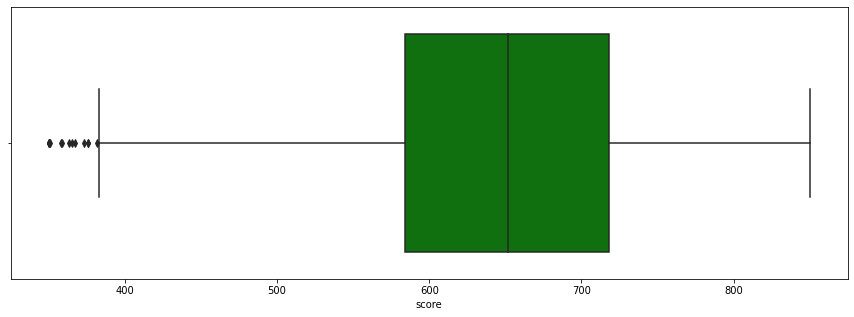

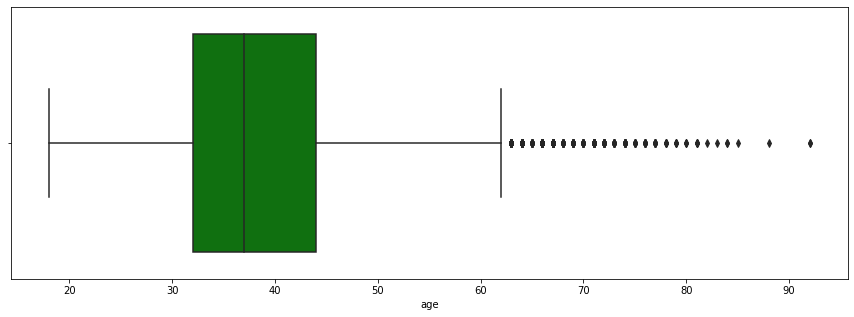

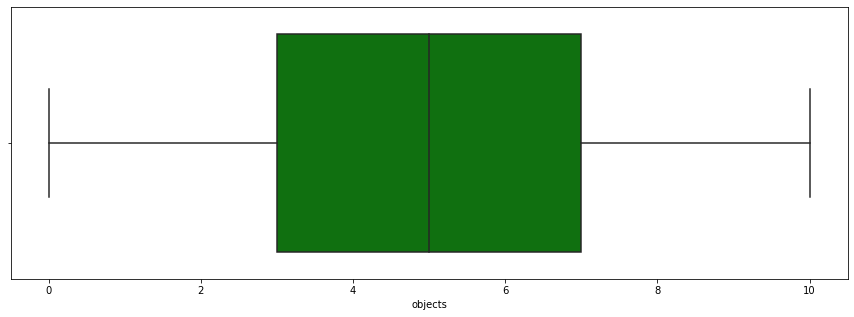

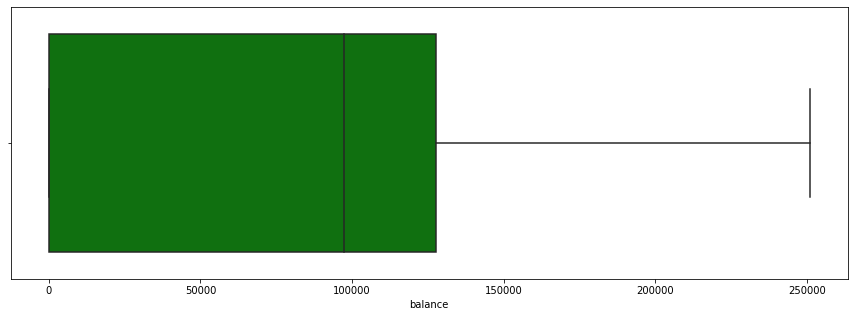

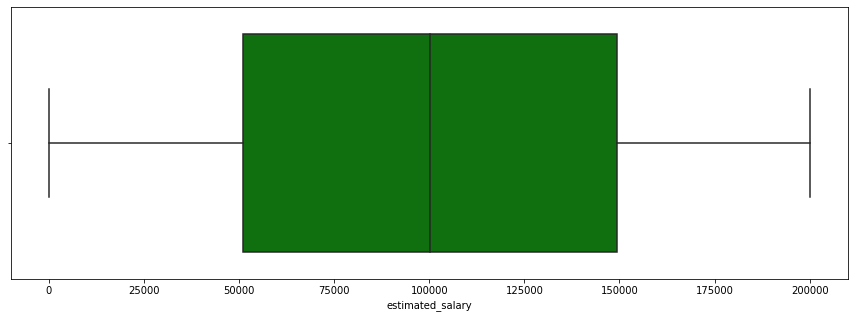

In [16]:
#построение боксплотов для просмотра аномальных значений 
columns = ['score', 'age', 'objects', 'balance', 'estimated_salary']
for col in columns:
    plt.figure()
    sns.boxplot(x=col, data=data, color = 'green')
    plt.show()

Вывод по второй части: выполнена предобработка данных, наименования столбцов приведены в общий вид, к нижнему регистру, проанализированы пропущенные значения столбца balance, пропущенные значения столбца balance заполнены нулями, выведены уникальные значения каждого столбца, построены боксплоты для просмотра аномалий.

## Третья часть

### Исследовательский анализ данных 

#### Просмотр общего портрета клиентов банка

In [17]:
#вывод описания всего датасета с расчетом метрик 
round(data.describe(),0)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15733677.0,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,15608437.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,15671264.0,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,15733474.0,652.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,15795970.0,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,15858426.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


Вывод: баллы скоринга находятся в среднем в промежутке от 583 до 717 усл. ед., средний возраст клиентов составляет от 32 до 43 лет, количество объектов в собственности в среднем насчитывается в промежутке от 3 до 7 ед., баланса карты клиента в среднем находится в промежутке от 0 до 127660 усл. ед., среднее количество продуктов, используемых клиентами, варьируется в промежутке от 1 до 2 ед., средний уровень дохода клиентов варьируется в промежутке от 51113 до 149459 усл. ед. 

Далее разделим исходные данные на количественные и категориальные переменные и посмотрим в разрезе данной градации. 

#### Просмотр общего распределения активности клиентов по городу, полу, наличию кредитной карты

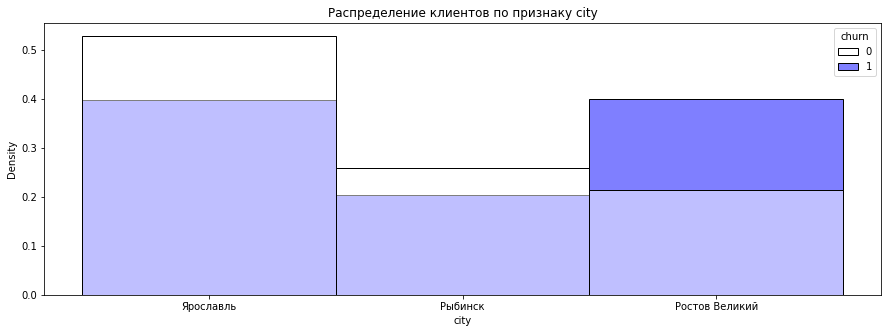

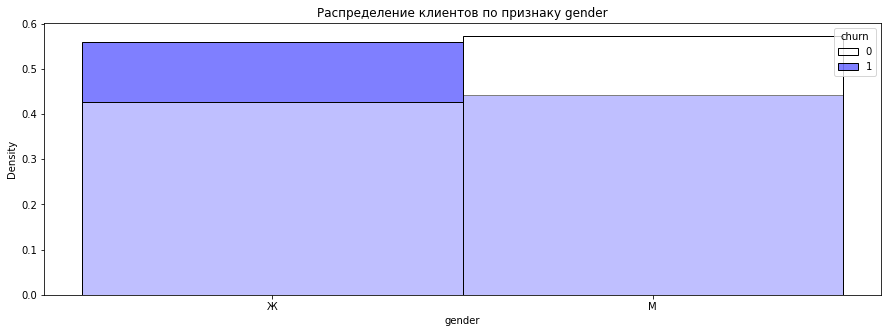

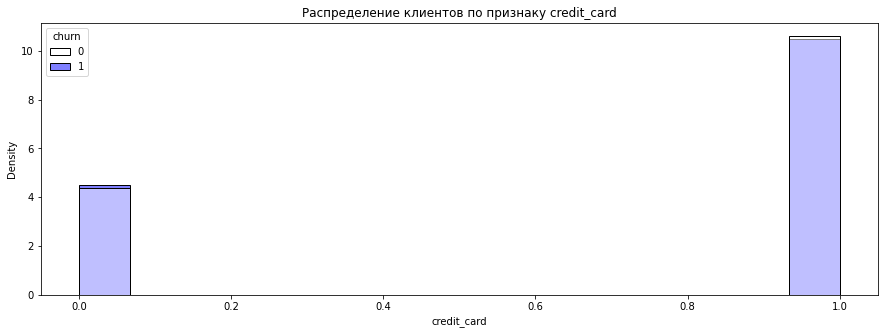

In [18]:
for col in ['city','gender', 'credit_card']:
    fig, ax = plt.subplots()
    sns.histplot(data = data,
                hue = 'churn',
                x = col,
                stat = "density",
                common_norm = False,
                ax = ax,
                palette = 'flag'
    )
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.show()

Вывод: чаще всего клиенты уходят из банка в Ростове Великом, женщины, и клиенты, не имеющие кредитные карты. 

#### Просмотр общего распределения активности клиентов по баллам скоринга, возрасту, количеству объектов в собственности, балансу, количеству продуктов, уровню дохода клиентов

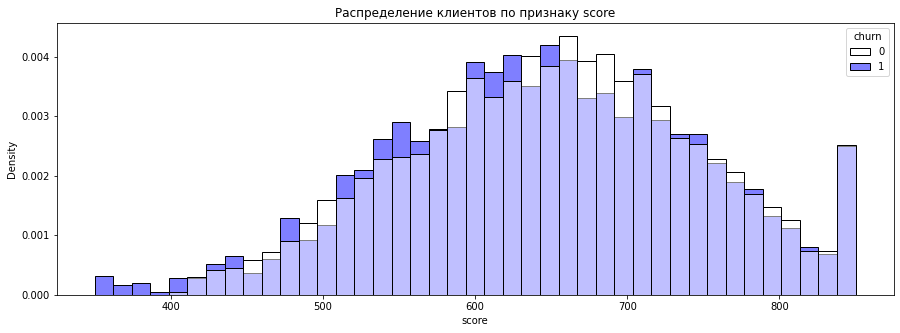

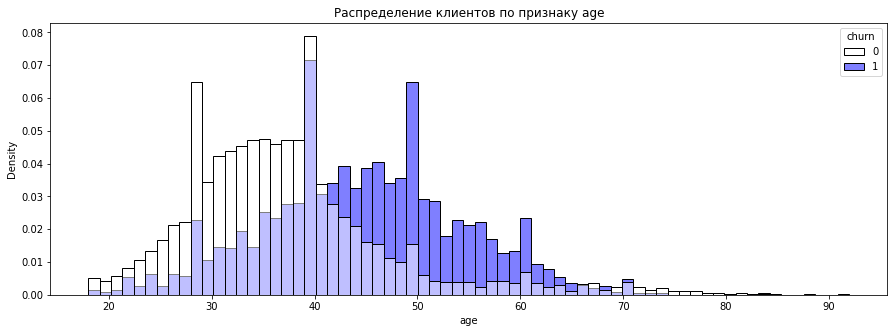

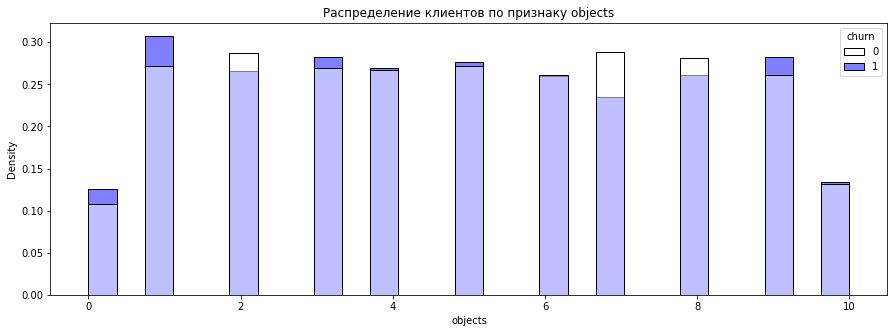

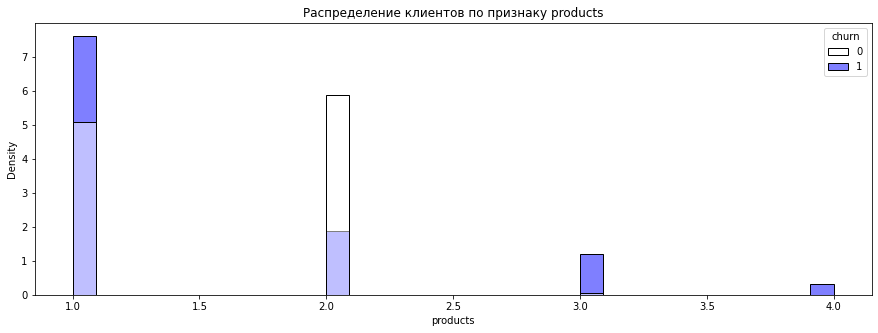

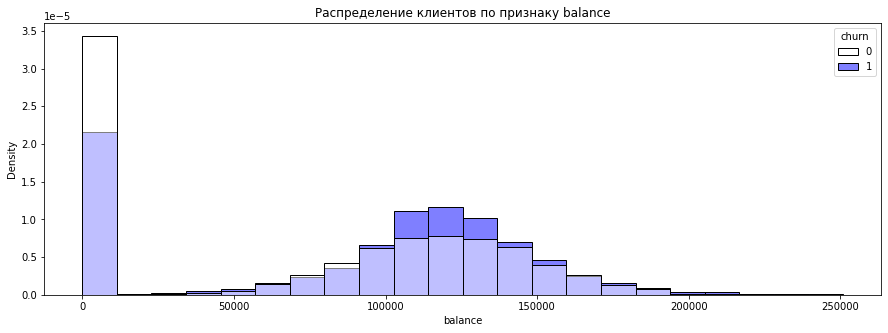

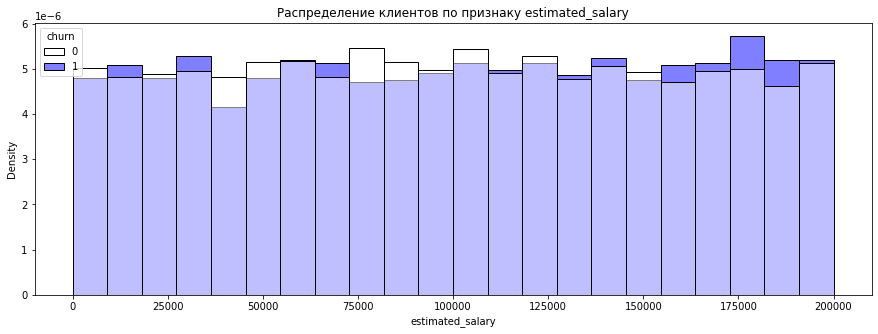

In [19]:
#просмотр общего распределения активности клиентов по баллам скоринга, возрасту, количеству объектов в собственности, балансу, количеству продуктов, уровню дохода клиентов
for col in ['score', 'age', 'objects', 'products', 'balance', 'estimated_salary']:
    fig, ax = plt.subplots()
    sns.histplot(data = data,
                hue = 'churn',
                x = col,
                stat = "density",
                common_norm = False,
                ax = ax,
                palette = 'flag'
    )
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.show()

Вывод: 
- чаще всего клиенты уходят с баллами скоринга до 400
- наблюдается уход клиентов с баллами скоринга в промежутке от 512 до 538 
- чаще всего уходят клиенты в возрасте от 42 до 62 лет
- наблюдается большой отток клиентов, не имюещих объектов в собственности, либо имеющих 1 или 9, наблюдается отток клиентов 
- наблюдается уход клиентов, имеющих 1, 3, 4 продукта банка
- наблюдается уход клиентов, имеющих баланс на карте от 100.000 до 250.000 усл. ед.
- наблюдается уход клиентов с уровнем дохода до 25.000, от 50.000 до 75.000, от 150.000 до 200.000 усл. ед. 

#### Исследование зависимости между признаками и их влиянием на активность клиентов

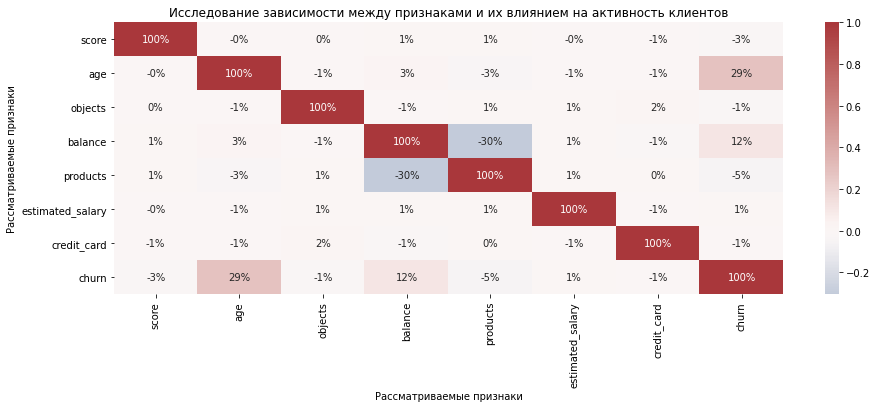

In [20]:
#построение матрицы корреляции 
sns.heatmap(data[['score', 'age', 'objects', 'balance', 'products', 'estimated_salary', 'credit_card', 'churn']].corr(), 
            annot = True, fmt='.0%', cmap="vlag", center=0)
plt.title('Исследование зависимости между признаками и их влиянием на активность клиентов')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=360)
plt.ylabel('Рассматриваемые признаки')
plt.xlabel('Рассматриваемые признаки');

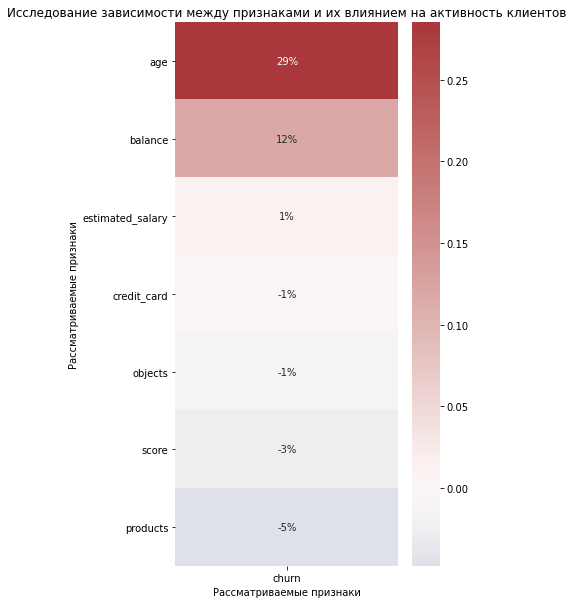

In [21]:
#построение столбца корреляции 
plt.figure(figsize=(5, 10))
sns.heatmap(data[['score', 'age', 'objects', 'balance', 'products', 'estimated_salary', 'credit_card', 'churn']].corr()
            .drop('churn').sort_values('churn', ascending=False)[['churn']], 
            annot = True, fmt='.0%', cmap="vlag", center=0)
plt.title('Исследование зависимости между признаками и их влиянием на активность клиентов')
plt.xticks(fontsize=10, rotation=360)
plt.yticks(fontsize=10, rotation=360)
plt.ylabel('Рассматриваемые признаки')
plt.xlabel('Рассматриваемые признаки');

Вывод: исходя из матрицы корреляции делаем вывод, что возраст и баланс на карте наиболее влияют на активность клиентов. Зависимость возраста и оттока клиентов составляет 29 %, зависимость баланса на карте и оттока клиентов составляет 12 %. 

#### Выделение сегментов клиентов, склонных уходить из банка 

Исходя из исследовательского анализа: выделены следующие ключевые признаки, сильно влияющие на отток клиентов: 
- возраст 48-62 лет, отток клиентов начинается с 51% и растет
- количество продуктов, у людей, имеющих 3-4 продукта, отток клиентов составляет от 83% до 100%.
- предложение: так как по признаку количества продуктов, % оттока является максимальным и критичным, предлагается проанализировать разделение признаков в зависимости от количества продуктов. 

In [22]:
#большой отток наблюдается среди женщин, отфильтруем датасет по полу и просмотрим метрики
data_women = data.query("gender == 'Ж'")
round(data_women.describe(),2)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.0,4543.00,4543.00
mean,15733884.79,650.83,39.24,4.97,75659.37,1.54,0.70,0.5,100601.54,0.25
std,71803.16,96.79,10.59,2.91,62102.47,0.60,0.46,0.5,57371.03,0.43
min,15608437.00,350.00,18.00,0.00,0.00,1.00,0.00,0.0,91.75,0.00
25%,15671621.50,584.00,32.00,2.00,0.00,1.00,0.00,0.0,51224.48,0.00
50%,15734219.00,652.00,38.00,5.00,96147.55,1.00,1.00,1.0,101905.34,0.00
75%,15796378.50,717.00,45.00,7.00,127141.78,2.00,1.00,1.0,148963.12,1.00
max,15858426.00,850.00,85.00,10.00,238387.56,4.00,1.00,1.0,199992.48,1.00


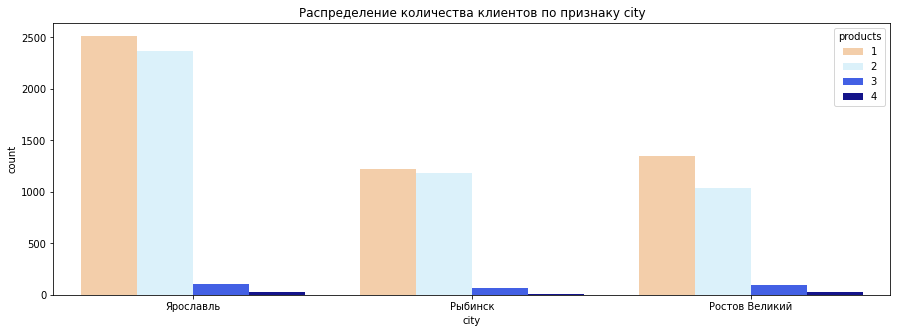

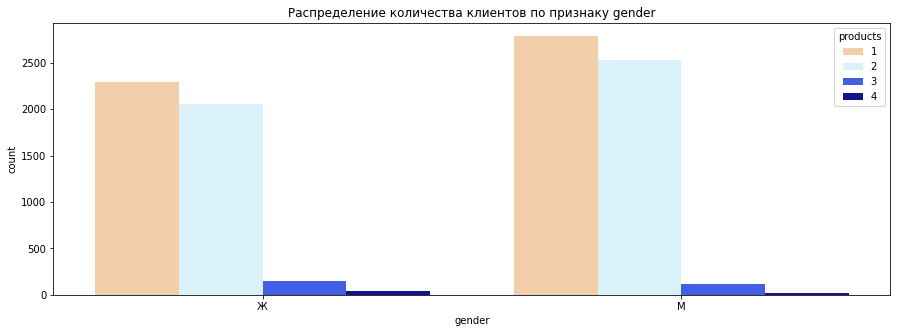

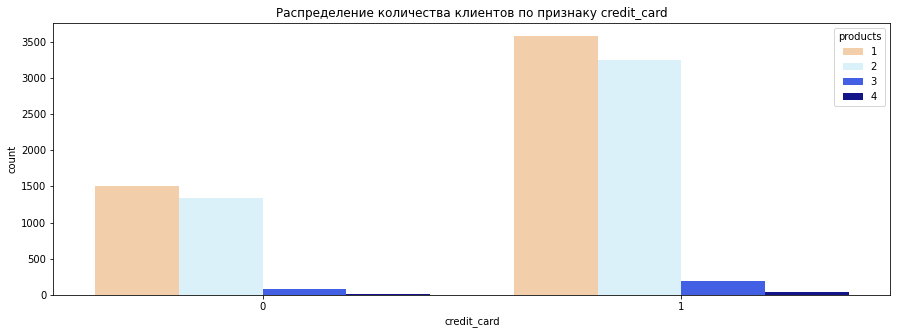

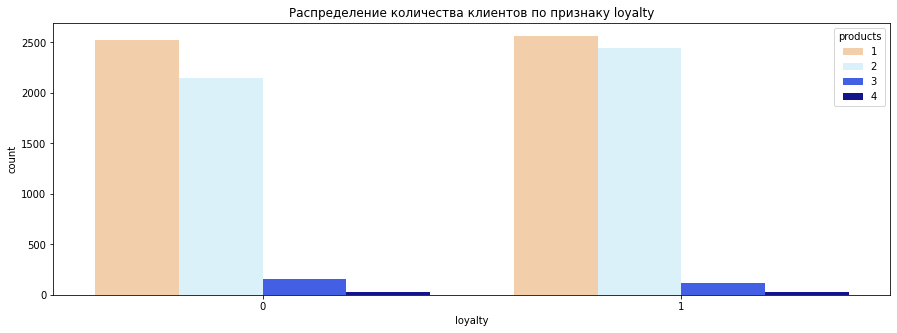

In [23]:
#распределение клиентов по количеству продуктов в разрезе города, пола, возраста, количеством объектов, наличием кредитной карты, активности клиента. 
for col in ['city', 'gender', 'credit_card', 'loyalty']:
    fig, ax = plt.subplots()
    sns.countplot(data = data,
                hue = 'products',
                x = col,
                ax = ax,
                palette = 'flag'
    )
    plt.title(f'Распределение количества клиентов по признаку {col}')
    plt.show()

Вывод: 
- наибольшое количество клиентов, используют 1 продукт, данные клиенты есть во всех городах, затем идут клиенты, использующие 2 продукта, также данные клиенты есть во всех городах;
- чаще 1 продуктом пользуются мужчины, также 2 продукта чаще всего заказывают тоже мужчины;
- наибольшее количество клиентов, использующих 1 продуктов имеют возраст 38 лет, наибольшее количество клиентов, использующих 2 продукт, находятся в возрасте 37 лет;
- у клиентов, использующих 1 или 2 продукта чаще всего есть кредитная карта;
- клиенты, у которых есть 1 или 2 продукта находятся как в категории активных, так и в категории неактивных клиентов.

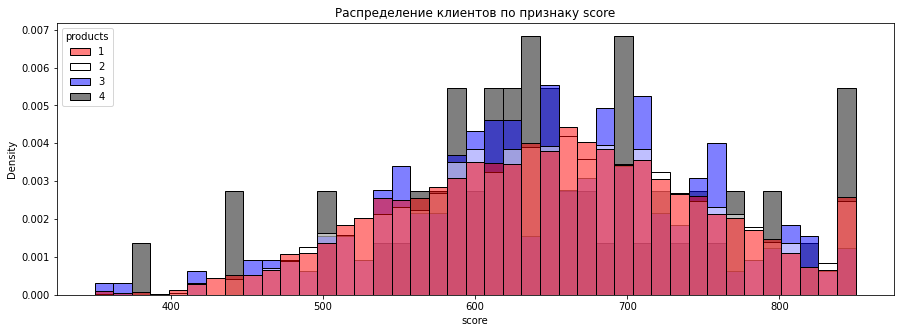

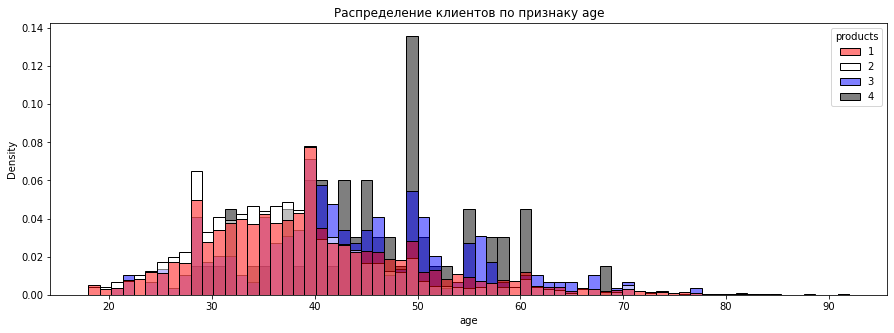

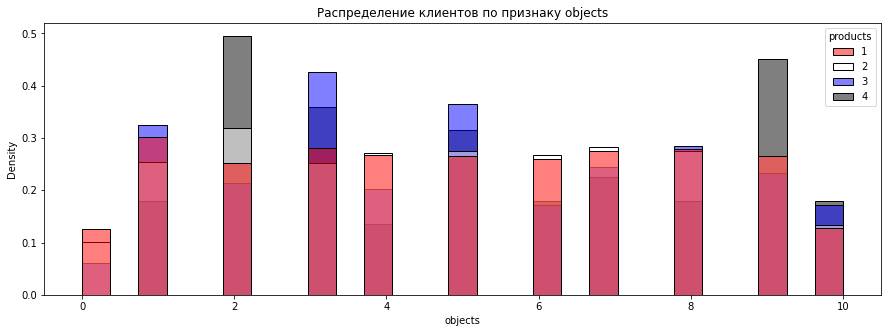

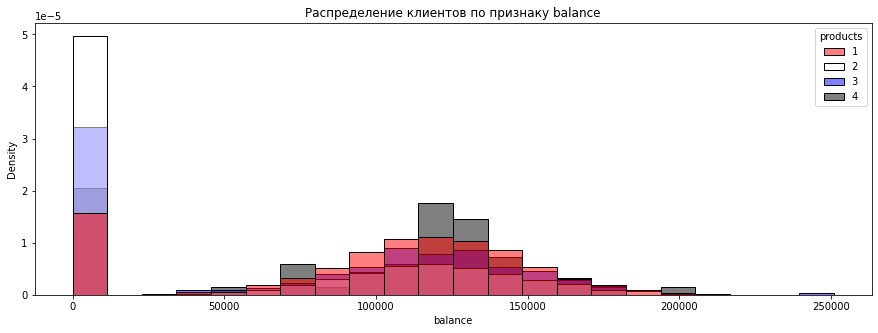

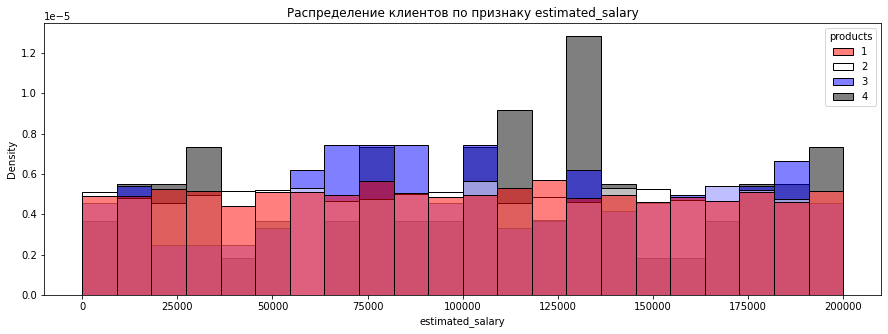

In [24]:
#распределение клиентов по количеству продуктов в разрезе баллов скоринга, возраста, количеством объектов, наличием кредитной карты, активности клиента. 
for col in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    fig, ax = plt.subplots()
    sns.histplot(data = data,
                hue = 'products',
                x = col,
                stat = "density",
                common_norm = False,
                ax = ax,
                palette = 'flag'
    )
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.show()

Вывод: 
- наибольшее количество клиентов, чьи баллы скоринга равны от 350 до 850, пользуются 1 продуктом;
- наибольшее количество клиентов, использующих 1 продукт, находятся в возрасте от 18 до 42;
- все клиенты, либо имеющие в собственности объекты, или нет, пользуются хотя бы 1 продуктом;
- у клиентов, имеющих баланс на карте от 0 до 200.000 усл. ед. (0 обусловлен тем, что мы заполнили им пропущенные значения) пользуются в основном 1 продуктом;
- клиенты с разным уровнем дохода в основном пользуются 1 продуктом.

Выделены следующие сегменты:
1. Сегмент - клиенты, использующие 1 продукт банка и живущие в Ростове Великом, отток таких клиентов составляет 32%.
2. Сегмент - клиенты, в возрасте от 48 лет, % оттока таких клиентов составляет от 51%.
3. Сегмент - клиенты женщины с балансом от 0 до 127.000 усл. ед. и доходом от 50.000 до 150.000 усл. ед. 

In [25]:
#расчет количества клиентов в сегменте 1 
data_products_1 = pd.pivot_table(data.query("products == 1 & city == 'Ростов Великий'"), 
                                 index=['products', 'city'], values='user_id', aggfunc='count').sum()
data_products_1

user_id    1349
dtype: int64

In [26]:
#расчет количества клиентов в сегменте 2
data_age = pd.pivot_table(data.query("age > = 48"), 
                                 index=['age'], values='user_id', aggfunc='count').sum()
data_age

user_id    1710
dtype: int64

In [27]:
#расчет количества клиентов в сегменте 3
data_gender_women =  pd.pivot_table(data.query("gender == 'Ж' &  50000 <= estimated_salary <= 150000"),
                                    index=['gender', 'estimated_salary', 'balance'], values='user_id', aggfunc='count').sum()
data_gender_women

user_id    2324
dtype: int64

Вывод по третьей части: выделены следующие сегменты клиентов, склонных уходить из банка.
1. Сегмент - клиенты, использующие 1 продукт банка и живущие в Ростове Великом, отток таких клиентов составляет 32%, количество таких клиентов составляет 1349. 
2. Сегмент - клиенты, в возрасте от 48 лет, % оттока таких клиентов составляет от 51%, количество таких клиентов составляет 1710. 
3. Сегмент - клиенты женщины с балансом от 0 до 127.000 усл. ед. и доходом от 50.000 до 150.000 усл. ед., количество таких клиентов составляет 2324. 

## Четвертая часть

### Проверка статистических гипотез 

#### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались

Формулировка гипотез:

1. Нулевая гипотеза: примем за нулевую гипотезу суждение, что статистически значимых различий среднего дохода между теми клиентами, которые ушли, и теми клиентами. которые остались, нет. 
2. Альтернативная гипотеза: примем за альтернативную гипотезу суждение, что статистически значимые различия среднего дохода между теми клиентами, которые ушли, и теми клиентами. которые остались, есть. 
3. Применяем статистический критерий: U-критерий Манна — Уитни, так как данный критерий непараметрический статистический и используется для сравнения выраженности показателей в двух независимых выборках.

In [28]:
churn_estimated_salary = data[data['churn'] == 1]['estimated_salary']
not_churn_estimated_salary = data[data['churn'] == 0]['estimated_salary']

#вызов метода для проверки гипотезы
results = st.ttest_ind(
    churn_estimated_salary, 
    not_churn_estimated_salary,
    equal_var=False)

#значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы различия между возрастами клиентов, которые ушли и теми, которые остались

Формулировка гипотез:

1. Нулевая гипотеза: примем за нулевую гипотезу суждение, что статистически значимых различий в среднем возрасте между теми клиентами, которые ушли, и теми клиентами. которые остались, нет. 
2. Альтернативная гипотеза: примем за альтернативную гипотезу суждение, что статистически значимые различия среднего возраста между теми клиентами, которые ушли, и теми клиентами. которые остались, есть. 
3. Применяем статистический критерий: U-критерий Манна — Уитни, так как данный критерий непараметрический статистический и используется для сравнения выраженности показателей в двух независимых выборках.

In [29]:
churn_age = data[data['churn'] == 1]['age']
not_churn_age = data[data['churn'] == 0]['age']

#вызов метода для проверки гипотезы
results = st.ttest_ind(
    churn_age, 
    not_churn_age,
    equal_var=False)

#значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7127272656641046e-179
Отвергаем нулевую гипотезу


Вывод: 
- статистически значимых различий среднего дохода между теми клиентами, которые ушли, и теми клиентами. которые остались, нет;
- статистически значимые различия среднего возраста между теми клиентами, которые ушли, и теми клиентами. которые остались, есть.

## Пятая часть

### Общий вывод по проделанной работе

Итог: 
1. Импортированы библиотеки, датасет, просмотрена общая информация о датасете: дан датасет, состоящий из 12 столбцов, 10000 строк, в данных имеются пропуски, также необходимо привести наименование колонок к общему виду, типы данных float, int, object.
2. Выполнена предобработка данных, наименования столбцов приведены в общий вид, к нижнему регистру, проанализированы пропущенные значения столбца balance, пропущенные значения столбца balance заполнены нулями, выведены уникальные значения каждого столбца, построены боксплоты для просмотра аномалий.
3. По датасету: баллы скоринга находятся в среднем в промежутке от 583 до 717 усл. ед., средний возраст клиентов составляет от 32 до 43 лет, количество объектов в собственности в среднем насчитывается в промежутке от 3 до 7 ед., баланса карты клиента в среднем находится в промежутке от 0 до 127660 усл. ед., среднее количество продуктов, используемых клиентами, варьируется в промежутке от 1 до 2 ед., средний уровень дохода клиентов варьируется в промежутке от 51113 до 149459 усл. ед.
4. Исходя из матрицы корреляции делаем вывод, что возраст и баланс на карте наиболее влияют на активность клиентов. Зависимость возраста и оттока клиентов составляет 29 %, зависимость баланса на карте и оттока клиентов составляет 12 %.
5. Выявлены следующие признаки оттока клиентов:
- чаще всего клиенты уходят из банка в Ростове Великом, женщины, и клиенты, не имеющие кредитные карты;
- чаще всего клиенты уходят с баллами скоринга до 400;
- наблюдается уход клиентов с баллами скоринга в промежутке от 512 до 538;
- чаще всего уходят клиенты в возрасте от 42 до 62 лет;
- наблюдается большой отток клиентов, не имюещих объектов в собственности, либо имеющих 1 или 9, наблюдается отток клиентов; 
- наблюдается уход клиентов, имеющих 1, 3, 4 продукта банка;
- наблюдается уход клиентов, имеющих баланс на карте от 100.000 до 250.000 усл. ед.;
- наблюдается уход клиентов с уровнем дохода до 25.000, от 50.000 до 75.000, от 150.000 до 200.000 усл. ед. 
6. Выделены следующие ключевые признаки, сильно влияющие на отток клиентов: 
- возраст 48-62 лет, отток клиентов начинается с 51% и растет
- количество продуктов, у людей, имеющих 3-4 продукта, отток клиентов составляет от 83% до 100%.
- предложение: так как по признаку количества продуктов, % оттока является максимальным и критичным, предлагается проанализировать разделение признаков в зависимости от количества продуктов. 
7. Выделены следующие сегменты клиентов, склонных уходить из банка.
- сегмент 1 - клиенты, использующие 1 продукт банка и живущие в Ростове Великом, отток таких клиентов составляет 32%, количество таких клиентов составляет 1349. 
- сегмент 2 - клиенты в возрасте от 48 лет, % оттока таких клиентов составляет от 51%, количество таких клиентов составляет 1710. 
- сегмент 3 - клиенты женщины с балансом от 0 до 127.000 усл. ед. и доходом от 50.000 до 150.000 усл. ед., количество таких клиентов составляет 2324.
8. Проверены статистические гипотезы, выявлено:
- статистически значимых различий среднего дохода между теми клиентами, которые ушли, и теми клиентами. которые остались, нет;
- статистически значимые различия среднего возраста между теми клиентами, которые ушли, и теми клиентами. которые остались, есть.
9. Рекомендации по удержанию клиентов: 
- по сегменту 1: проверить работу персонала, качество предоставляемых услуг в банке в городе Ростов Великий, также проанализировать каким именно продуктом пользуются клиенты банка, улучшить его;
- по сегменту 2: предложить клиентам в возрасте от 48 лет более выгодные условия использования продуктов, запустить акции на привлечение клиентов;
- по сегменту 3: предложить клиентам женщинам более выгодные условия использования продуктов, запустить акции на привлечение клиентов (кэшбек от партнеров, различные скидки в магазинах, на услуги бьюти-сфер). 

## Материалы

* [Презентация] (https://disk.yandex.ru/i/-g3gB9chy5CYog)
* [Дашборд] (https://public.tableau.com/views/Yandex_Project_Final/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)